In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [36]:
data=pd.read_csv("/Users/erdemtasdelen/Desktop/python_lessons/data/diabetes_dataset.csv")
veri=data.copy()

In [37]:
y=veri["Outcome"]
X=veri.drop(columns="Outcome")

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [54]:
model=RandomForestClassifier(random_state=0, criterion="entropy",
max_depth=5, min_samples_split=10, n_estimators=1000)
model.fit(X_train,y_train)
tahmin=model.predict(X_test)

In [41]:
acs=accuracy_score(y_test,tahmin)
print(acs*100)

75.32467532467533


In [42]:
#parametreler={"criterion":["gini","entropy"],
#"max_depth":[2,5,10],
#"min_samples_split":[2,5,10]
#"n_estimators":[50,200,500,1000]
              

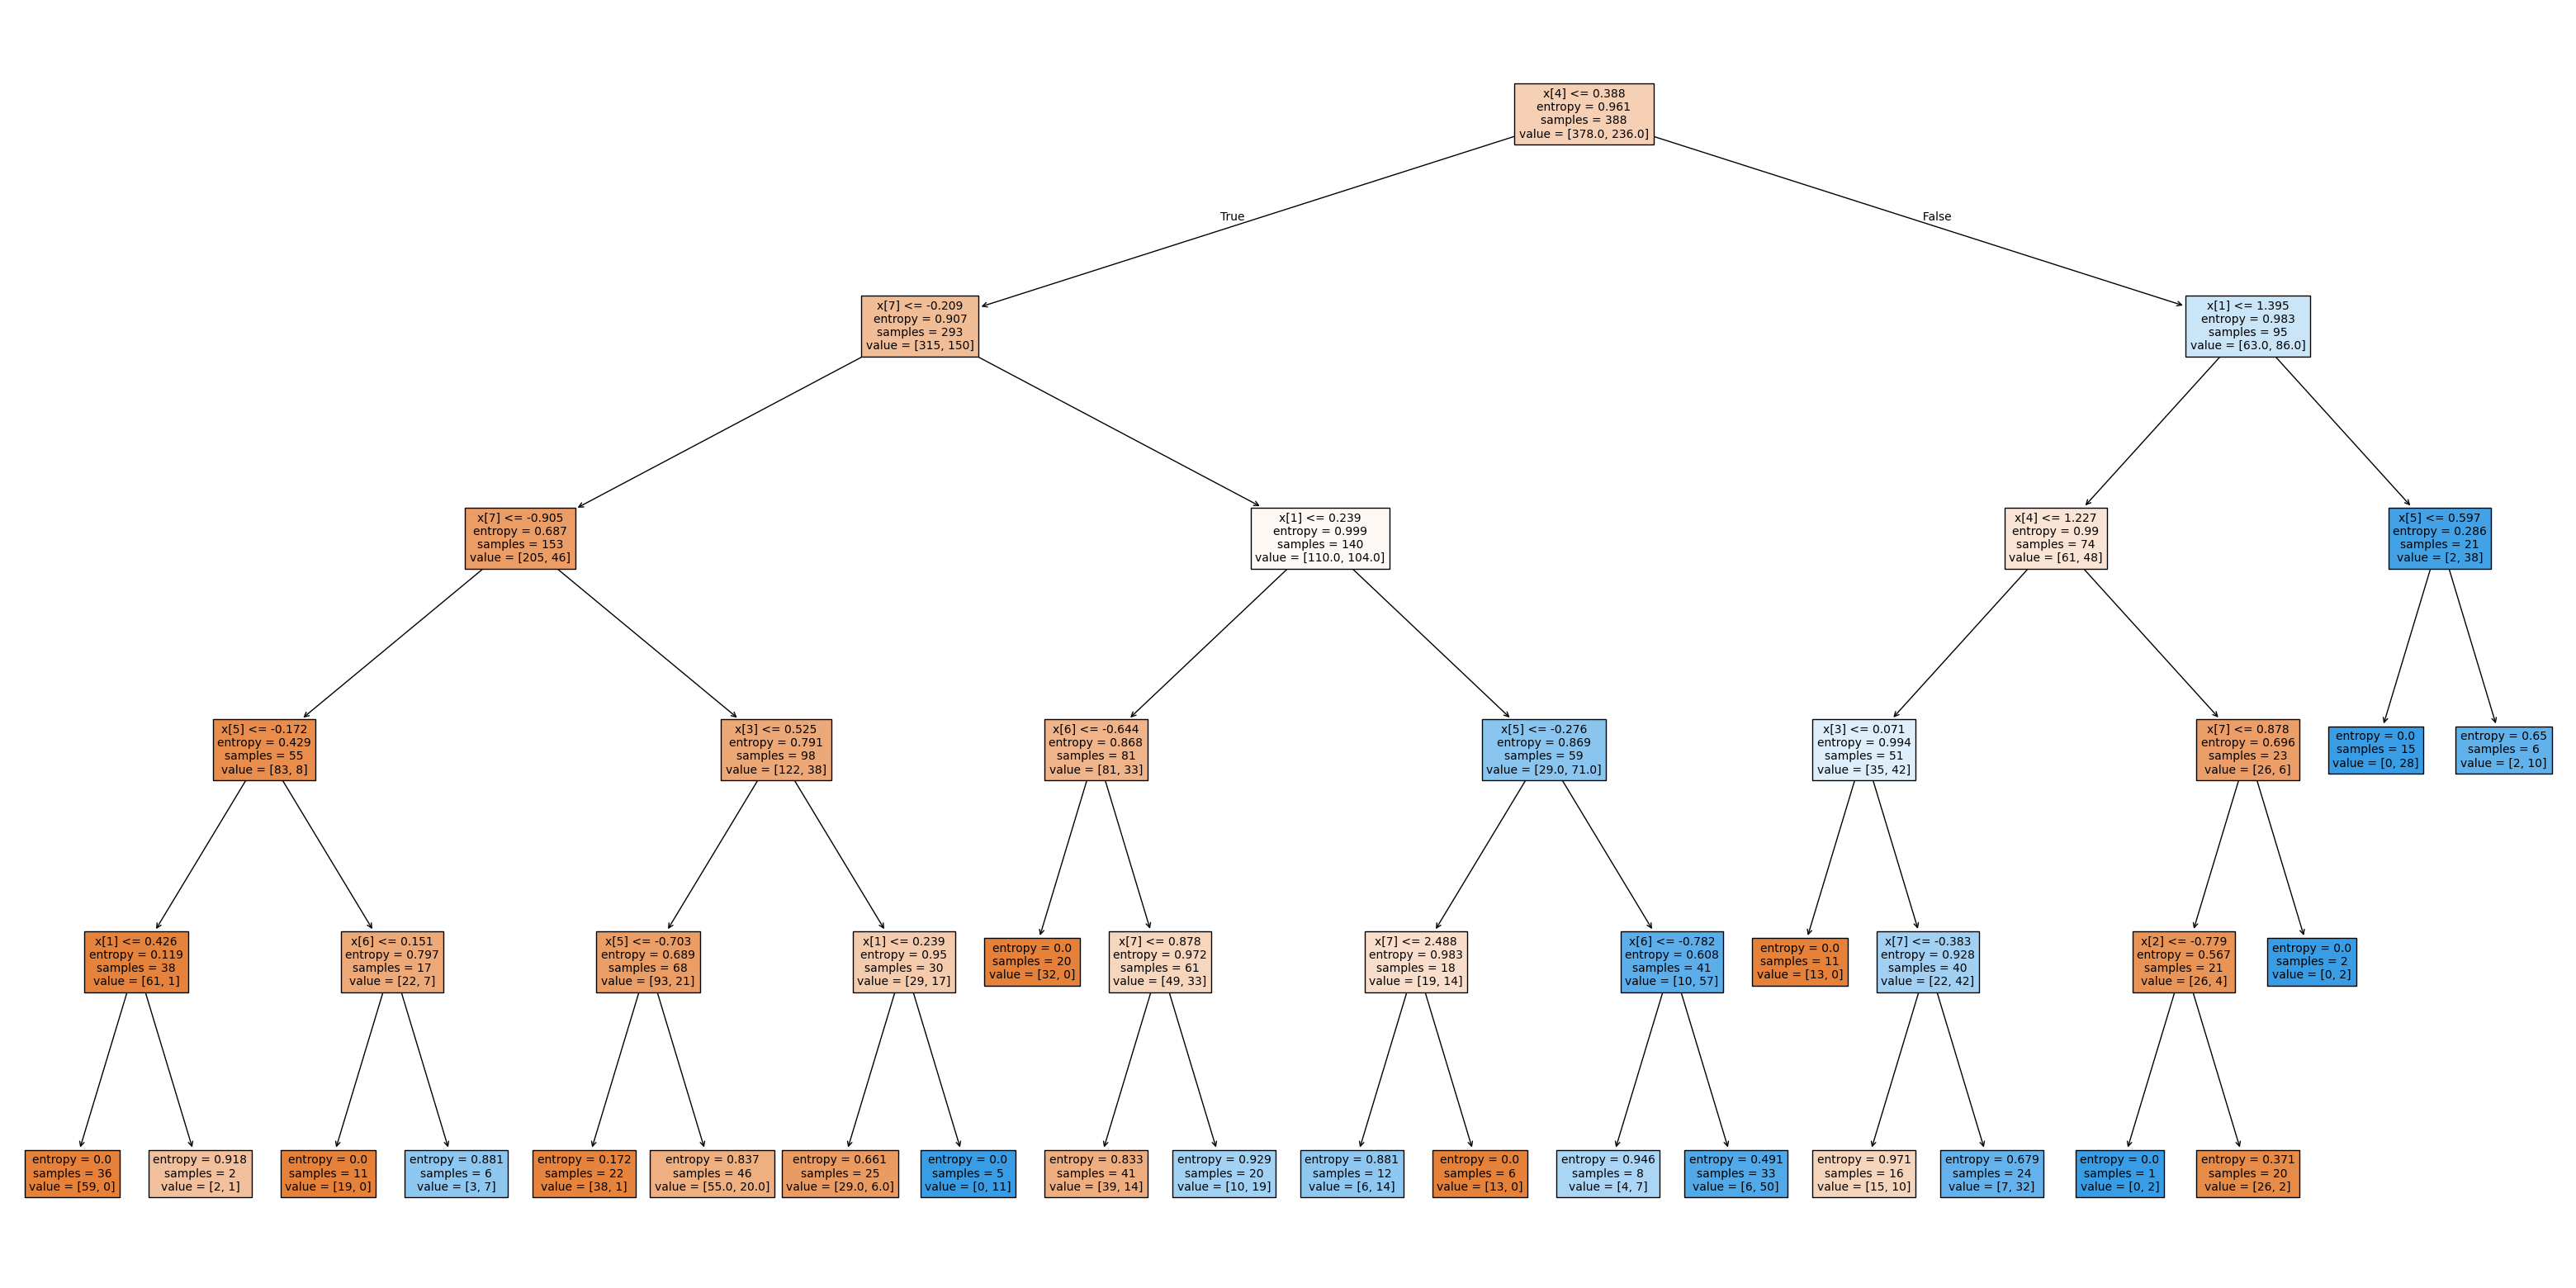

In [55]:
plt.figure(figsize=(40,20))
plot_tree(model[0], filled=True, fontsize=10)
plt.show()

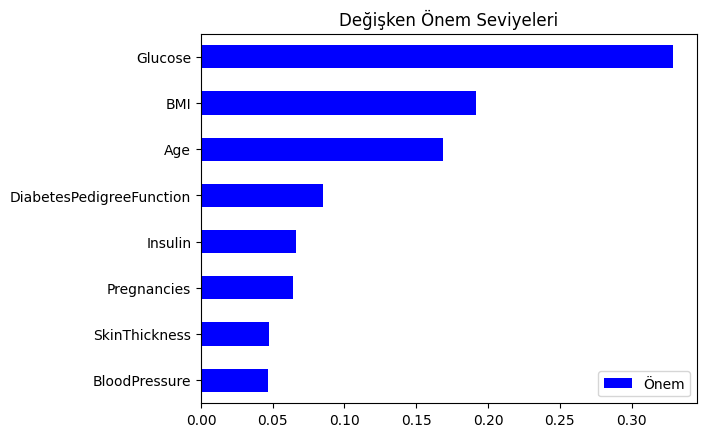

In [61]:
önem=pd.DataFrame({"Önem":model.feature_importances_},index=X.columns)
önem.sort_values(by="Önem",axis=0,ascending=True).plot(kind="barh",color="blue")
plt.title("Değişken Önem Seviyeleri")
plt.show()